In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned datasets
train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

Train Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Has_Cabin  FamilySize  Sex_male  Embarked_Q  \
0         A/5 21171   7.2500          0           2         1           0   
1          PC 17599  71.2833          1           2         0           0   
2  STON/O2. 3101282   7.9250          0           1         0           0   
3  

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [13]:
# Display basic statistics and data types for the training dataset
print("\nTrain Dataset Info:")
print(train_df.info())
print("\nTrain Dataset Description:")
print(train_df.describe(include='all'))

# Display basic statistics and data types for the test dataset
print("\nTest Dataset Info:")
print(test_df.info())
print("\nTest Dataset Description:")
print(test_df.describe(include='all'))


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Has_Cabin      891 non-null    int64  
 10  FamilySize     891 non-null    int64  
 11  Sex_male       891 non-null    int64  
 12  Embarked_Q     891 non-null    int64  
 13  Embarked_S     891 non-null    int64  
 14  Title_Miss     891 non-null    int64  
 15  Title_Mr       891 non-null    int64  
 16  Title_Mrs      891 non-null    int64  
 17  Title_Officer  891 non-null    in

In [14]:
# Check for missing values in the training dataset
print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())

# Check for missing values in the test dataset
print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())


Missing Values in Train Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Has_Cabin        0
FamilySize       0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

Missing Values in Test Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Has_Cabin        0
FamilySize       0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64


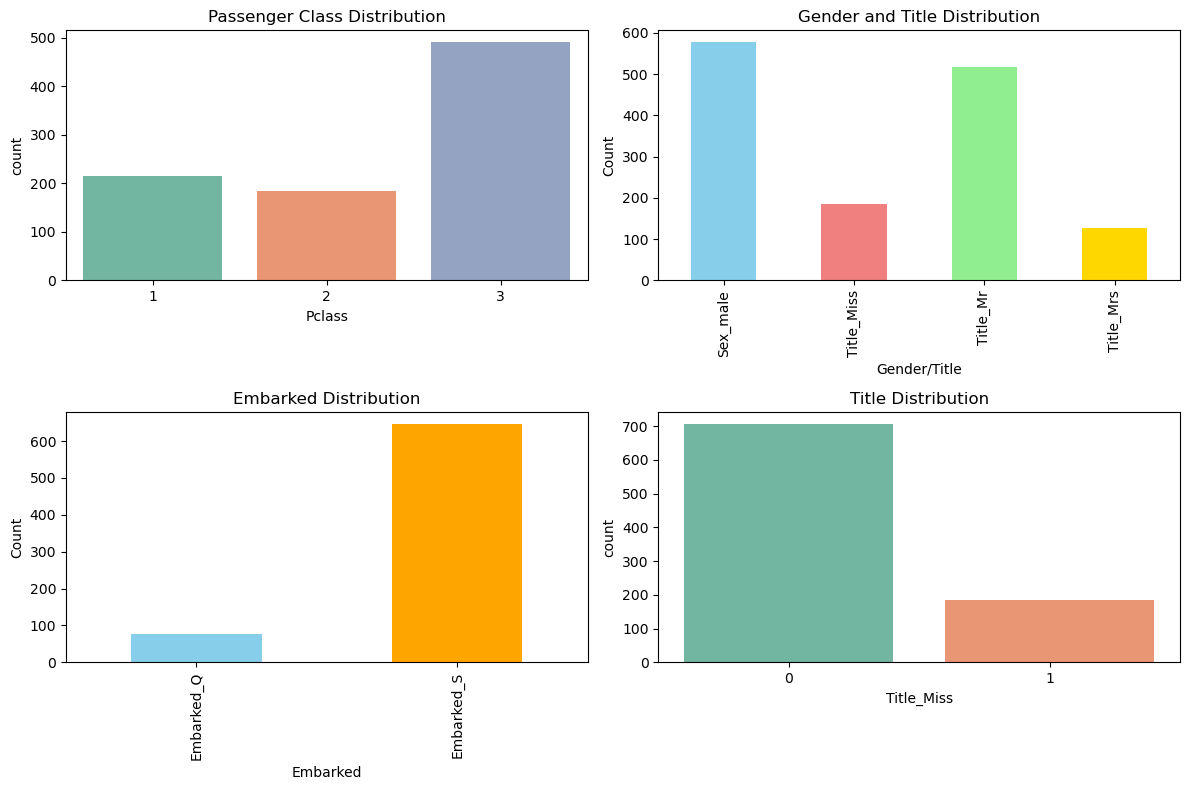

In [15]:
# Plot the distribution of categorical variables in the training dataset
plt.figure(figsize=(12, 8))

# Passenger Class Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', data=train_df, palette='Set2')
plt.title('Passenger Class Distribution')

# Gender Distribution (combined with title information)
plt.subplot(2, 2, 2)
gender_title_columns = ['Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs']
train_df[gender_title_columns].sum().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Gender and Title Distribution')
plt.xlabel('Gender/Title')
plt.ylabel('Count')

# Embarked Distribution
plt.subplot(2, 2, 3)
embarked_columns = ['Embarked_Q', 'Embarked_S']
train_df[embarked_columns].sum().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Title Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Title_Miss', data=train_df, palette='Set2')  # Modify if more titles are present
plt.title('Title Distribution')

plt.tight_layout()
plt.show()

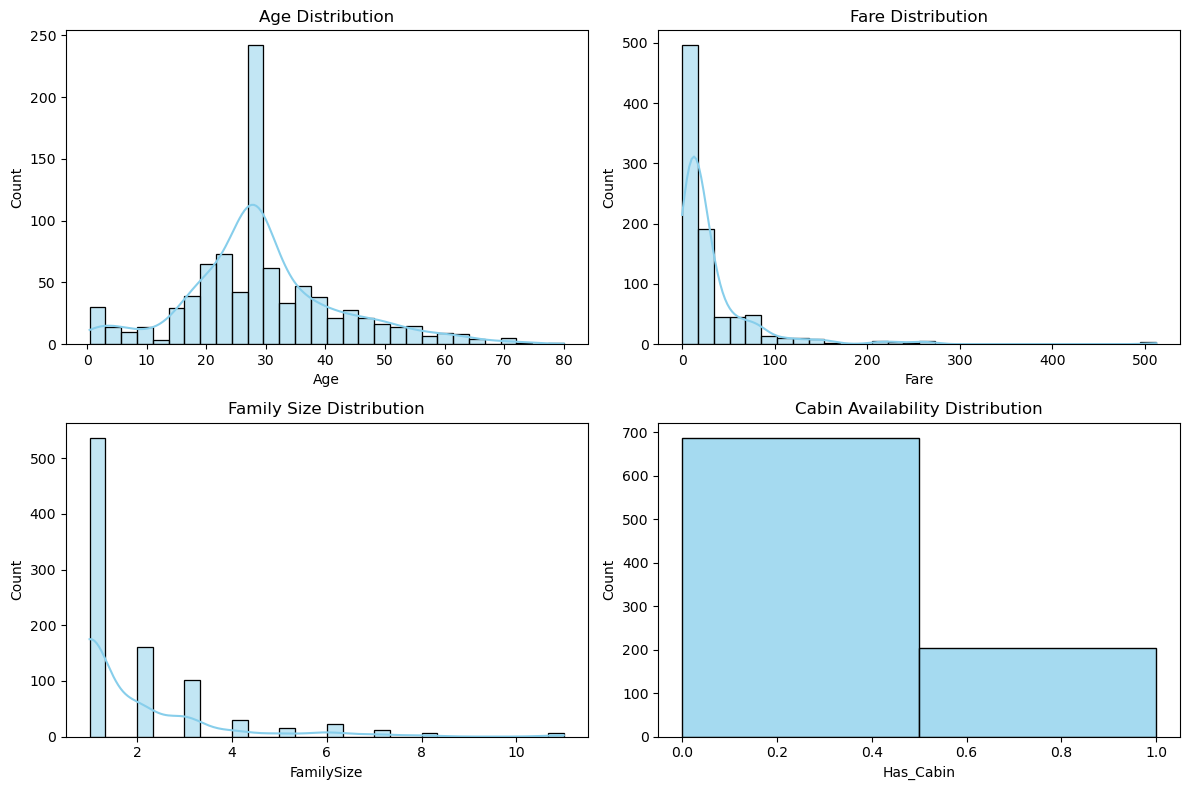

In [16]:
# Plot histograms for numerical variables in the training dataset
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(train_df['Fare'], bins=30, kde=True, color='skyblue')
plt.title('Fare Distribution')

plt.subplot(2, 2, 3)
sns.histplot(train_df['FamilySize'], bins=30, kde=True, color='skyblue')  # Ensure 'FamilySize' is correct
plt.title('Family Size Distribution')

plt.subplot(2, 2, 4)
sns.histplot(train_df['Has_Cabin'], bins=2, kde=False, color='skyblue')  # Ensure 'Has_Cabin' is correct
plt.title('Cabin Availability Distribution')

plt.tight_layout()
plt.show()

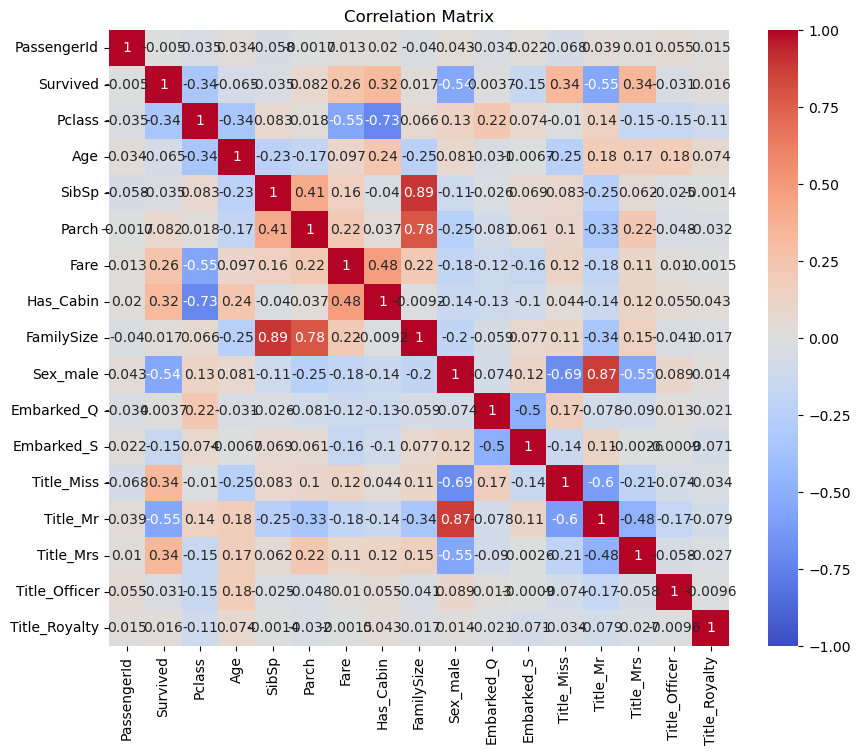

In [17]:
# Compute and plot correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

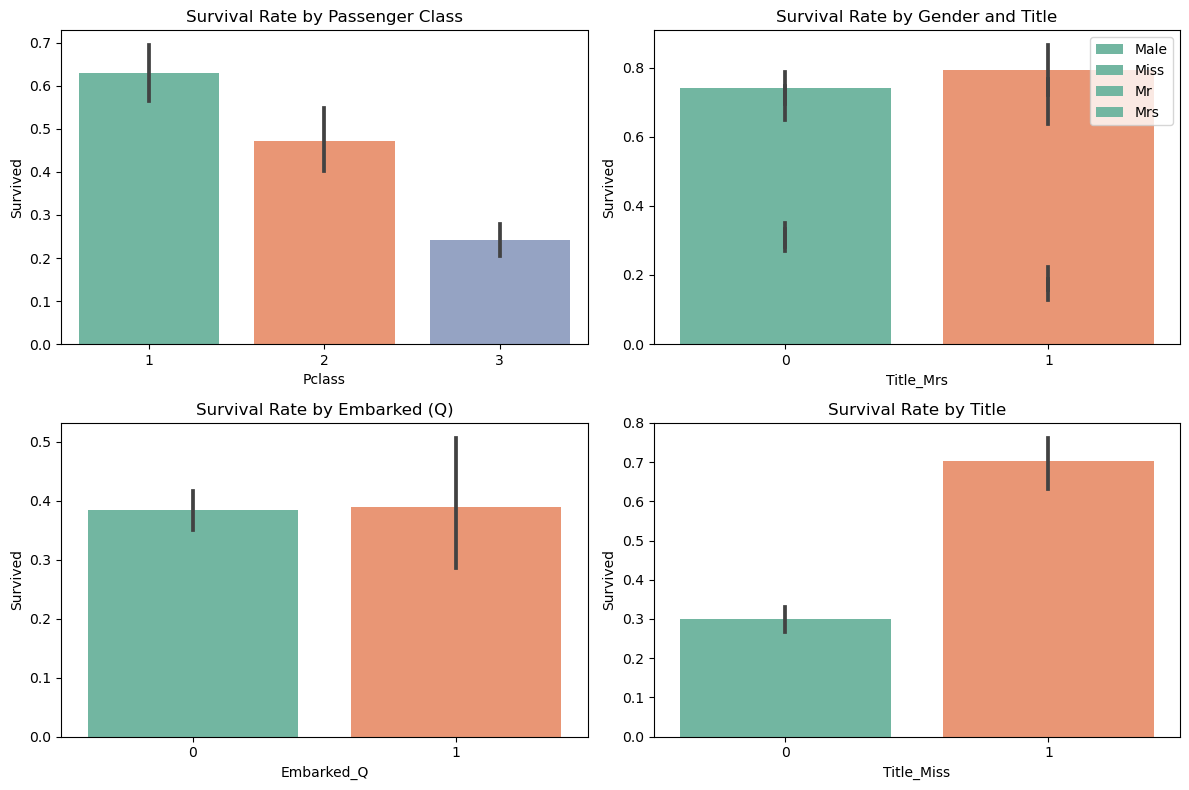

In [18]:
# Plot survival rate by categorical variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Set2')
plt.title('Survival Rate by Passenger Class')

plt.subplot(2, 2, 2)
# Combined gender and title distribution
sns.barplot(x='Sex_male', y='Survived', data=train_df, palette='Set2', label='Male')
sns.barplot(x='Title_Miss', y='Survived', data=train_df, palette='Set2', label='Miss')
sns.barplot(x='Title_Mr', y='Survived', data=train_df, palette='Set2', label='Mr')
sns.barplot(x='Title_Mrs', y='Survived', data=train_df, palette='Set2', label='Mrs')
plt.title('Survival Rate by Gender and Title')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.barplot(x='Embarked_Q', y='Survived', data=train_df, palette='Set2')
plt.title('Survival Rate by Embarked (Q)')

plt.subplot(2, 2, 4)
sns.barplot(x='Title_Miss', y='Survived', data=train_df, palette='Set2')  # Update if more titles are present
plt.title('Survival Rate by Title')

plt.tight_layout()
plt.show()

In the exploratory analysis of the Titanic dataset, `Pclass`, `Sex`, and `Title` are key in explaining survival rates, showing that certain classes, genders, and titles had different survival chances. For example, women and children had higher survival rates than men. There’s a strong link between `Pclass` and survival, with higher classes having better survival rates. To analyze these relationships, you can use chi-square tests for categorical variables and t-tests or ANOVA for numerical comparisons. Regression analysis can also help understand how these factors affect survival.